# Simón Palacios

## Ejercicio 10 
>Generar una estructura con los nombres y la suma de ambas notas en base a los archivos  <font color = 'blue'>* nombre1_txt * </font>, <font color = 'blue'>* eval *</font> y <font color = 'blue'>* eval2 *</font>. Luego calcular la nota promedio entre todos los alumnos e informar aquellos alumnos que tienen un promedio de notas menor al promedio general.  
****************
### Resolucion
>$P_{1}$ Informar alumnos con promedios menores a la media
>   * Notas y nombres
>   * promedio individual
>   * promedio general
>
>$P_{2}$ Obtener listas [nombres, notas_totales]
>
>$P_{3}$ Sumar notas
>   * notas 1 + notas 2 + notas N
>
>$P_{4}$ Limpiar caracteres extra
>   * nombres -> ascii.letters, notas -> string.digits
>
>$P_{5}$ Reconocer datos
>   * nombres, notas
>
>$P_{6}$ Abrir archivo 
>   * nombre_archivo, ruta_actual
**************

* $P_{6}$ Abrir archivo 
> Para abrir el archivo se toma el directorio actual y se le concatena el nombre que se recibe por parámetro. Este modulo retorna el contenido del archivo, como elementos separados por salto de linea, en una lista.

In [1]:
import os


def abrir_archivo(nombre):
    """ Abre el archivo previamente cargado en 'archivo_nombre'
    y retorna su contenido como una lista donde sus elementos están
    divididos por un salto de línea"""
    base_path = os.path.abspath(os.path.dirname('EJ10.py'))
    archivo = os.path.join(base_path, nombre + '.txt')
    with open(archivo, 'r', encoding="utf-8") as fp:
        contenido = fp.readlines()
    return contenido

* $P_{5}$ Reconocer datos
>Este módulo recorrer el contenido del archivo quitando los valores de la lista excluidos en cada palabra, luego consulta el primer valor del contenido y dependiendo si son numeros o nombres agrega al final de la lista que contiene además de filtrar que no halla caracteres que no pertenecen al tipo de dato que contiene.

In [2]:
def reconocer_datos(nombre):
    """ Recibe por parámetro el nombre del archivo a abrir para luego
    devolver su contenido como una lista que tiene en su índice -1 el tipo
    de dato que contiene."""
    excluidos = ['\n', ',', "'"]
    contenido = abrir_archivo(nombre)
    for i in range(len(contenido)):
        palabra = [char for char in contenido[i] if char not in excluidos]
        contenido[i] = ''.join(char for char in palabra)
    if contenido[0].isalpha():
        contenido = limpiar_nombres(contenido)
        contenido.append("nombres")
    else:
        contenido = limpiar_nums(contenido)
        contenido.append("números")
    return contenido

* $P_{4}$ Limpiar caracteres extra
> Para limpiar los caracteres arme dos funciones según el problema. *limpiar_nombres* filtra los caracteres uno a uno por el conjunto de valores permitidos, luego rearma la palabra
y finalmente filtra los elementos de la lista vacíos. El módulo *limpiar_nums* hace lo mismo pero antes de devolverlo a su posición en la lista lo convierte en float.

In [3]:
def limpiar_nums(lista):
    """ Recibe una lista de números en formato string y devuelve
    una lista de números."""
    for i in range(len(lista)):
        clear_word = "".join(filter(lambda x: x in string.digits,
                                    lista[i]))
        lista[i] = float(clear_word)
    return lista


def limpiar_nombres(lista):
    """ Recibe una lista de nombres y devuelve la lista solo con los valores
    permitidos."""
    valores = string.ascii_letters.join(["á", "é", "í", "ó", "ú"])
    for i in range(len(lista)):
        clear_word = "".join(filter(lambda x: x in valores,
                                    lista[i].lower())).capitalize()
        lista[i] = clear_word
    return list(filter(lambda x: x != '', lista))

* $P_{3}$ Obtener estructura con los datos  
> *obtener_listados* define la condición por la cual se van a cargar los archivos si es por teclado o con los argumentos que recibe. Cualquiera de los dos casos llama *obtener_lista* que modifica el diccionario que recibe por parámetro agregando la lista según el tipo de datos que contiene. Al finalizar la carga *obtener_listados* retorna un diccionario.

In [4]:
def obtener_listas(nombre_archivo, textos):
    lista = reconocer_datos(nombre_archivo)
    tipo = lista.pop()
    textos[tipo].append(lista)
    if tipo == 'nombres':
        print(lista)
        print("tipo de archivo = strings")
    else:
        print(lista)
        print("tipo de archivo = dígitos")




In [5]:
def obtener_listados(*args):
    """ Lee por teclado nombres de archivos a cargar hasta que se ingresa
    'fin'. Retorna un diccionario con los tipos de texto (nombres, números)
    como keys y una lista de listas como value"""
    listados = {'nombres': [], 'números': []}
    if len(args) == 0:
        print("Comienzo carga de archivos (ingrese fin para terminar)")
        nombre_archivo = input('Nombre del archivo: ')
        while nombre_archivo != 'fin':
            obtener_listas(nombre_archivo, listados)
            nombre_archivo = input('Nombre del archivo: ')
    else:
        for i in range(3):
            obtener_listas(args[i], listados)
    print("-"*30)
    return listados

* $P_{2}$ Sumar notas
> Para sumar las notas se recibe como parametro una lista con las notas de cada estudiante por separado. notas = [notas1, notas2, notasN]. Se recorre la lista de notas acumulando los valores del mismo indice en la posicion 0 de la lista. Luego se le agrega la cantidad de notas que se sumaron al final de la lista.

In [6]:
def sumar_notas(notas):
    """ Suma las notas con el mismo índice de distintas listas y los guarda en
    la lista de posición '0'"""
    total = []
    for j in range(len(notas) - 1):
        total = [notas[0][i] + notas[j + 1][i]
                 for i in range(len(notas[0]))]
    total.append(len(notas))
    return total

* Calcular promedios

In [7]:
def promedio_indi(notas, div):
    return [nota / div for nota in notas]


def promedio_general(notas):
    return sum(notas) / len(notas) - 1

* $P_1$ Informar alumnos con promedios menores a la media  
> Para informar los alumnos con el promedio menor al promedio general armé un módulo que recibe como parametro las notas y nombres de los alumnos. Por cada nota calcula el promedio (*promedio_indi*) y lo almacena en una lista. El promedio general se obtiene de la suma de todas las notas dividido la cantidad de notas. Recorro la lista de promedios y  por cada promedio menor al promedio general imprimo en pantalla el nombre y promedio.  

In [8]:
def informar_promedios(notas, nombres):
    """ Recibe como parámetro las notas a promediar y los nombres, ambos
    relativos en cuanto a posición """
    cant_notas = notas.pop()
    prom_g = promedio_general(notas)
    promedios = promedio_indi(notas, cant_notas)
    print(f"Nombre{' ' * 9}| Prom.")
    print("-" * 30)
    for i in range(len(notas)):
        if promedios[i] < prom_g:
            promedio = float(promedios[i]).__format__(".4")
            esp = 15 - len(nombres[i])
            print(f"{nombres[i]}{' ' * esp}| {promedio} ")



* Yapa: menu interactivo

In [ ]:
import string

def elegir_op():
    """ Si se selecciona 'promedios' sin antes 'cargar' se usan los valores
    'nombres_1', 'eval' y 'eval2'."""
    print("""
    -~- Menu principal -~-\n
    1.  Cargar 
    2.  Promedios
    3.  Salir
    """)
    char = input('Opción (1-3): ')
    if char in string.digits:
        valor = int(char)
    else:
        valor = -1
    return valor


def main():
    fin = False
    pos = 0
    while not fin:
        choice = elegir_op()
        match choice:
            case 1:
                ls = obtener_listados()
                ls["números"] = sumar_notas(ls["números"])
                pos = 1
            case 2:
                if pos == 0:
                    ls = obtener_listados("nombres_1", "eval", "eval2")
                    ls["números"] = sumar_notas(ls["números"])
                informar_promedios(ls["números"], ls["nombres"][0])
            case 3:
                fin = True
            case _:
                print("Opción no válida")

main()

**********************
### Consulta

> Armé un diagrama de flujo de lo que sería la ejecución del programa. No estoy seguro que sea así la estructura, pero me gustaría saber si está bien pensado el esquema. Usé las flechas azules para indicar la llamada del módulo y las rojas para aquellos que retornan algo luego de la ejecución.  
Al iniciar el programa se ejecuta el método main(), el main llama a elegir opción que despliega una interfaz interactiva donde el resultado elegido opera sobre un case que determina el caso a ejecutar. Los casos se dividen por la facilitación de poder imprimir los promedios sin cargar por teclado los nombres de cada archivo, para el caso 2 se le pasa a la función *obtener_listados* los argumentos 'nombres_1', 'eval', 'eval2'. Siempre y cuando no se hallan cargado antes los archivos con nombres por teclado. En esta función implemento dos formas de llamar al módulo *obtener_lista* una con un while y otra con un for.$^1$ Si se decidió por cargar por teclado admite nombres de archivos hasta que se introduce fin, sino, se itera por la cantidad de argumentos llamando a la funcion *obtener_lista* con cada uno de los argumentos. Dentro de *obtener_lista* se llama a *reconocer_datos* en este módulo se invocan dos funciones distintas, primero *abrir_archivo* y luego a limpiar segun el tipo de datos que contiene.$^2$ Luego de limpiar todas las listas que contienen los datos de los archivos se ejecuta la funcion *sumar_notas*$^3$ y retorna al menú para elegir opciones si se eligió la opción 1. La función *informar_promedios* si bien no retorna nada, luego de calcular los promedios, imprime en pantalla los valores según la condición. Esto tendría que aparecer en el diagrama?
>
>
>$^1$En este punto dentro del esquema la iteración se representa con un bucle que pasa por un cuadro 'Fin?' .  
>$^2$Dado que limpiar implica dos funciones distintas *limpiar_nums* y *limpiar_nombres* eso se especifica tambien? O los diagramas no se llevan a tal nivel de detalle?  
>$^3$ Como se establece las prioridades en la ejecución? porque si bien están al mismo "nivel" primero se llama a *obtener_listados* y luego a *sumar_notas*

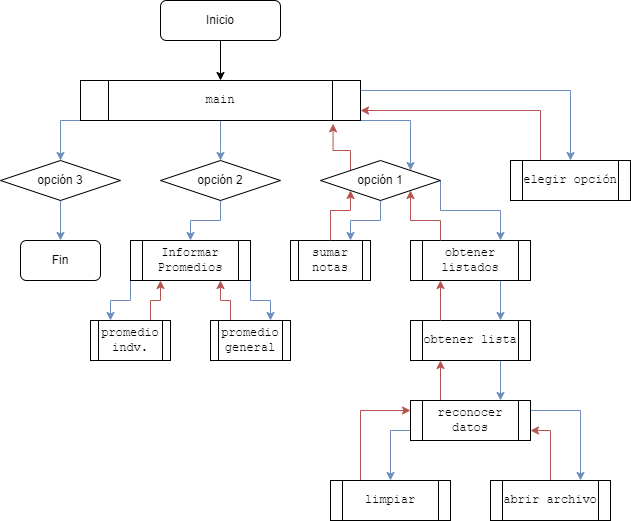